In [ ]:
#usamos las librerias necesarias para hacer el analisis descriptivo.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [ ]:
#importamos el dataset con pandas

df = pd.read_csv('db_train_default.csv')

df.head(5)

,Class,Edad,NSE,SEXO,Ingreso,NED,NoBancos,NoFinanc,RatioEnd,C6M,AumDeu,PI
0,0,49,B,M,38762,TT,3,5,50,1C,1.40,0
1,0,37,C,F,73319,ST,2,2,6,1C,2.02,0
2,0,41,C+,F,37002,TNT,2,2,317,1C,3.91,0
3,0,46,B,F,44683,TT,4,1,35,3,0.96,0
4,0,49,B,F,22066,TNT,1,5,36,2A,-2.22,0


In [ ]:
#la variable dependiente "class" que en este caso es 0 si el cliente no hace default y 1 si el cliente hace default.

#antes de comenzar, configuramos un mismo estilo para todas las graficas.

sns.set(style="whitegrid")

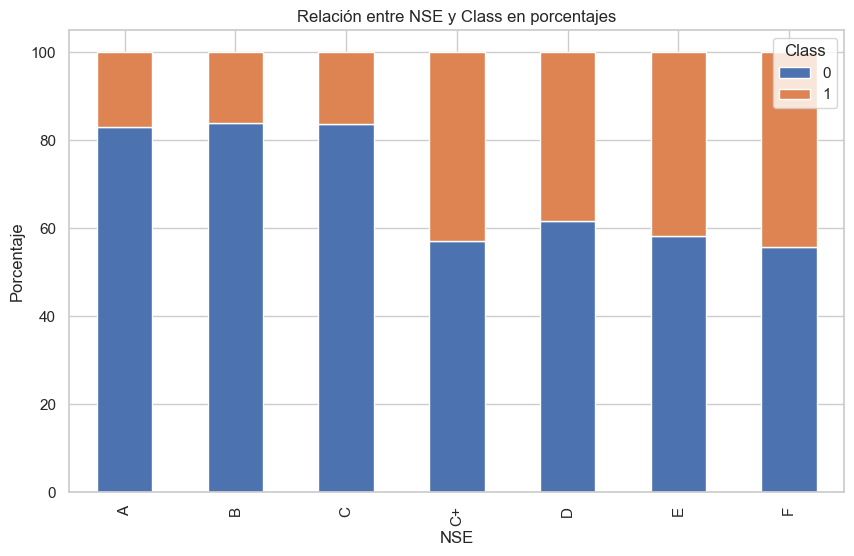

In [ ]:
#creamos grafico de barrras para NSE

#para hacer este grafico, representamos en porcentaje de cada clase dentro de cada categoria para las variables sexo, NSE, NED, NoBancos, NoFinanc, C6M y PI.
#Para las variables numericas continuas utilizamos graficos de distribución de las variables dependientes en función de la variable class.
# De esta forma se observa cómo impactan las distintas variables dependientes en la variable independiente (si el cliente defaultea o no).

# Calcular los porcentajes
df_percentage = df.groupby('NSE')['Class'].value_counts(normalize=True).unstack() * 100

# Crear el gráfico de barras agrupadas con porcentajes
df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizar el gráfico
plt.title('Relación entre NSE y Class en porcentajes')
plt.ylabel('Porcentaje')
plt.legend(title='Class', loc='upper right')
plt.show()

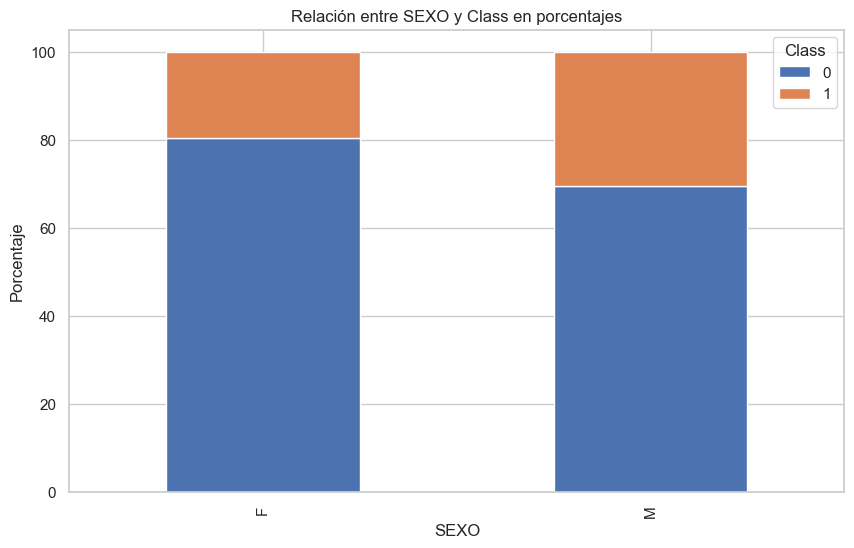

In [ ]:
#creamos grafico de barrras para sexo en porcentajes

# Calcular los porcentajes
df_percentage = df.groupby('SEXO')['Class'].value_counts(normalize=True).unstack() * 100

# Crear el gráfico de barras agrupadas con porcentajes
df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizar el gráfico
plt.title('Relación entre SEXO y Class en porcentajes')
plt.ylabel('Porcentaje')
plt.legend(title='Class', loc='upper right')
plt.show()

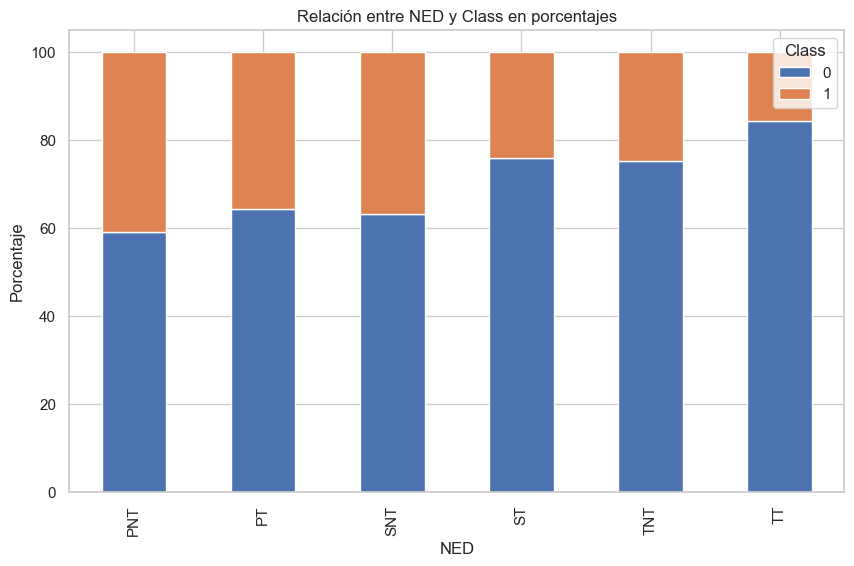

In [ ]:
# creamos grafico de barras para NED

# Calcular los porcentajes
df_percentage = df.groupby('NED')['Class'].value_counts(normalize=True).unstack() * 100

# Crear el gráfico de barras agrupadas con porcentajes
df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizar el gráfico
plt.title('Relación entre NED y Class en porcentajes')
plt.ylabel('Porcentaje')
plt.legend(title='Class', loc='upper right')
plt.show()

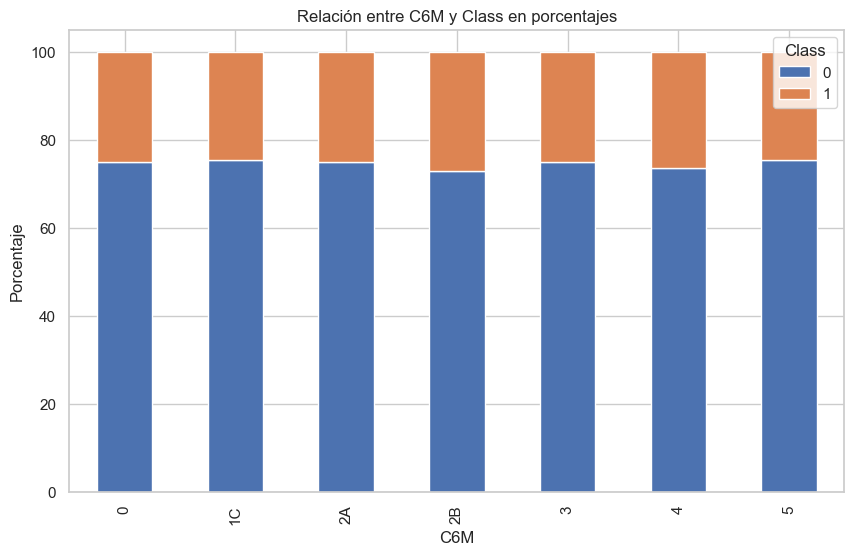

In [ ]:
# creamos grafico de barras para C6M

# Calcular los porcentajes
df_percentage = df.groupby('C6M')['Class'].value_counts(normalize=True).unstack() * 100

# Crear el gráfico de barras agrupadas con porcentajes
df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizar el gráfico
plt.title('Relación entre C6M y Class en porcentajes')
plt.ylabel('Porcentaje')
plt.legend(title='Class', loc='upper right')
plt.show()

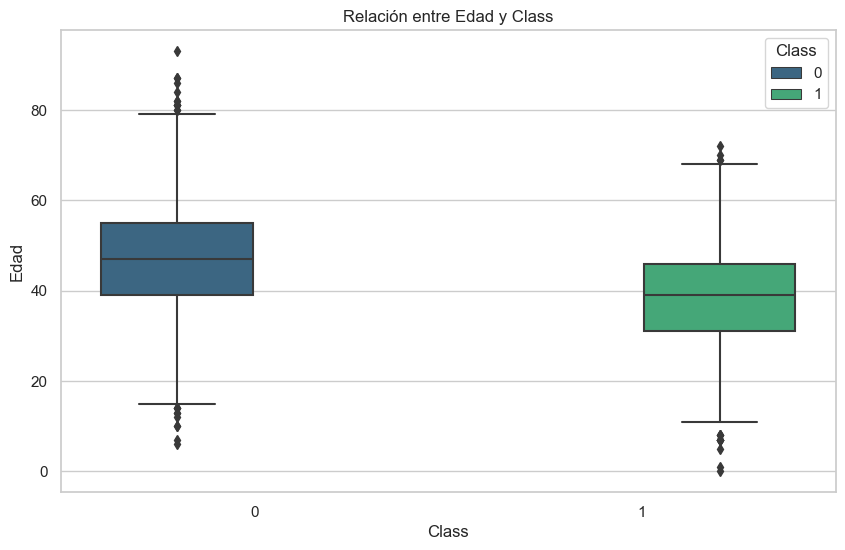

In [ ]:
# creamos grafico de dispersión para Edad

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='Edad', hue='Class', palette='viridis')
plt.title('Relación entre Edad y Class')
plt.show()

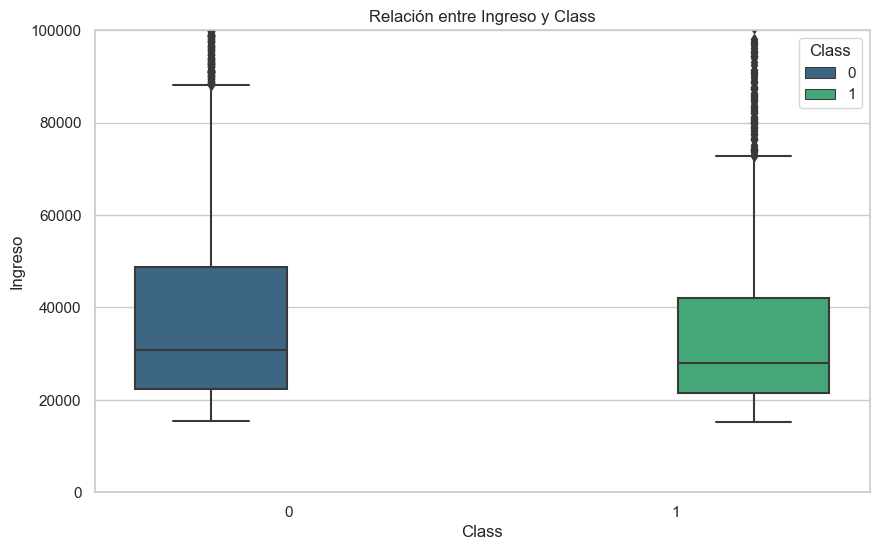

In [ ]:
# creamos grafico de dispersión para Ingreso
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='Ingreso', hue='Class', palette='viridis')
plt.title('Relación entre Ingreso y Class')
plt.ylim(0,100000) ## se hace un corte en ingresos inferiores a 100000 así se ve con mayor definición la distribución de los ingresos por clase.
plt.show()

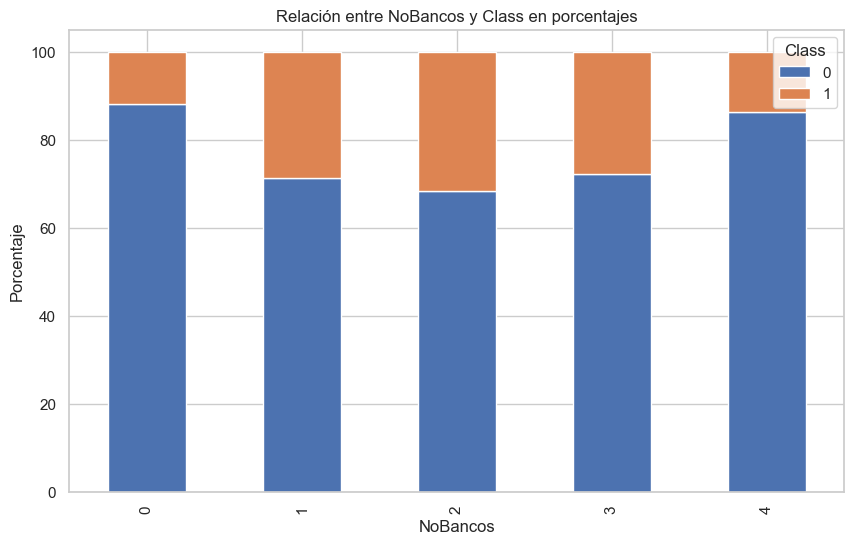

In [ ]:
# creamos grafico de dispersión para NoBancos

# Calcular los porcentajes
df_percentage = df.groupby('NoBancos')['Class'].value_counts(normalize=True).unstack() * 100

# Crear el gráfico de barras agrupadas con porcentajes
df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizar el gráfico
plt.title('Relación entre NoBancos y Class en porcentajes')
plt.ylabel('Porcentaje')
plt.legend(title='Class', loc='upper right')
plt.show()

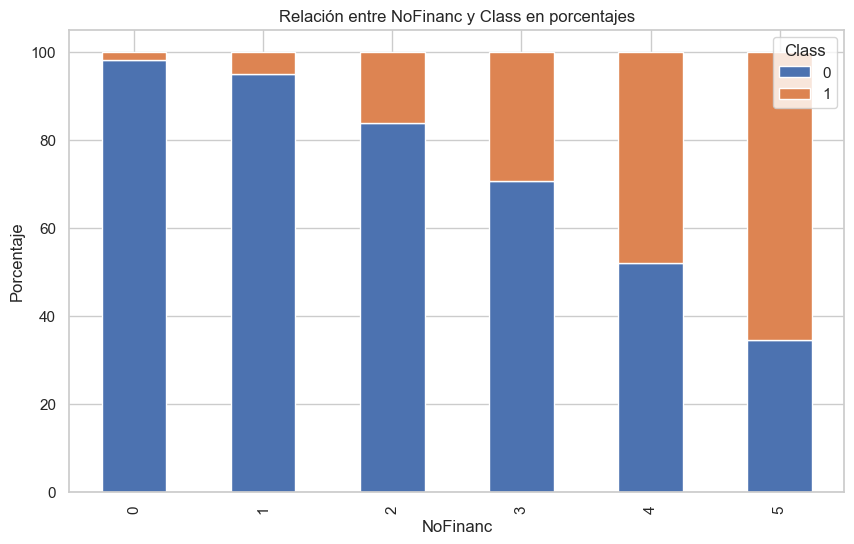

In [ ]:
# creamos grafico de dispersión para NoFinanc

# Calcular los porcentajes
df_percentage = df.groupby('NoFinanc')['Class'].value_counts(normalize=True).unstack() * 100

# Crear el gráfico de barras agrupadas con porcentajes
df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizar el gráfico
plt.title('Relación entre NoFinanc y Class en porcentajes')
plt.ylabel('Porcentaje')
plt.legend(title='Class', loc='upper right')
plt.show()

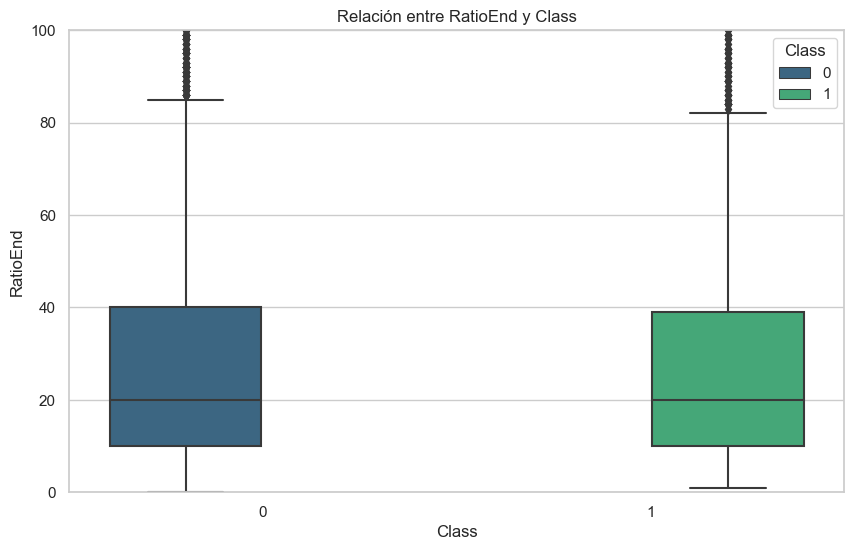

In [ ]:
# creamos grafico de dispersión para RatioEnd
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='RatioEnd', hue='Class', palette='viridis')
plt.title('Relación entre RatioEnd y Class')
plt.ylim(0,100)
plt.show()

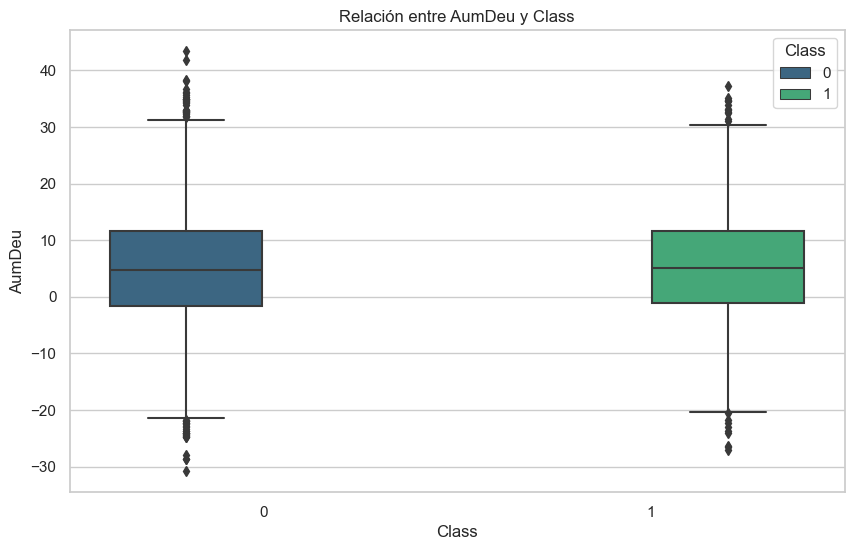

In [ ]:
# creamos grafico de dispersión para AumDeu
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='AumDeu', hue='Class', palette='viridis')
plt.title('Relación entre AumDeu y Class')
plt.show()

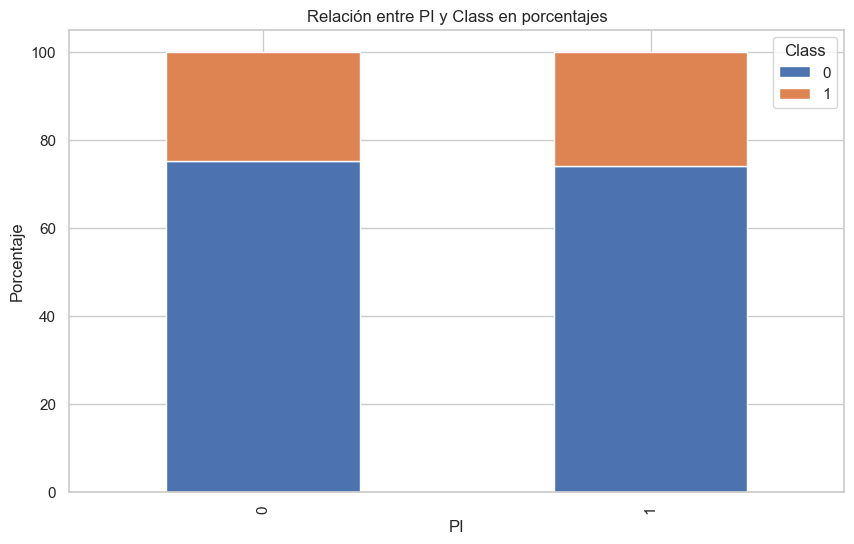

In [ ]:
#Gráfico de PI

# Calcular los porcentajes
df_percentage = df.groupby('PI')['Class'].value_counts(normalize=True).unstack() * 100

# Crear el gráfico de barras agrupadas con porcentajes
df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizar el gráfico
plt.title('Relación entre PI y Class en porcentajes')
plt.ylabel('Porcentaje')
plt.legend(title='Class', loc='upper right')
plt.show()

## CROSS VALIDATION

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate

db_train = pd.read_csv('db_train_default.csv')
db_test_default = pd.read_csv('db_test_default.csv', sep=';')
# Separar características y objetivo
X_train = db_train.drop('Class', axis=1)
y_train_db = pd.DataFrame(db_train['Class'])

# Codificar variables categóricas
X_train = pd.get_dummies(X_train)

X_test_default = db_test_default
X_test_default = pd.get_dummies(X_test_default)


Con el método cross validation busco el modelo óptimo (ajustando los parámetros óptimos) que minimice el error en test.

In [ ]:
learningRate=np.arange(0.01, 0.2, 0.02)
depth=np.arange(1, 5, 1)
ntrees=np.arange(100, 501, 100)
k_fold = 5

#defino la matriz de resultados
resultsBooCV = pd.DataFrame()

for i in ntrees:
    for j in depth:
        for h in learningRate:
            Boo = GradientBoostingClassifier(n_estimators= i, learning_rate= h, max_depth=j, random_state=0)
            # utilizo cross_validatation
            scores = cross_validate(Boo, X_train, y_train_db, scoring=['accuracy', 'precision', 'recall', 'f1'], cv=k_fold, return_estimator=True)
            acc = scores['test_accuracy'].mean()
            pre = scores['test_precision'].mean()
            rec = scores['test_recall'].mean()
            f1 = scores['test_f1'].mean()
            er = 1-acc
            res = pd.DataFrame([[i,j,h,er, acc,pre, rec, f1]])
            resultsBooCV = pd.concat([resultsBooCV,res])

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted sa

In [ ]:
resultsBooCV.columns = ['NTrees','Depth','Lambda','CV_ErrorRate', "Acc", "Pre", "Rec", "F1"]
resultsBooCV.sort_values(["CV_ErrorRate"], ascending=True)

,NTrees,Depth,Lambda,CV_ErrorRate,Acc,Pre,Rec,F1
0,500,1,0.19,0.047000,0.953000,0.929446,0.879302,0.903590
0,500,1,0.17,0.048125,0.951875,0.928658,0.875312,0.901121
0,400,1,0.19,0.048500,0.951500,0.929468,0.872818,0.900154
0,500,1,0.15,0.048750,0.951250,0.928922,0.872319,0.899659
0,400,1,0.17,0.049250,0.950750,0.930588,0.868329,0.898310
...,...,...,...,...,...,...,...,...
0,100,1,0.03,0.162250,0.837750,0.861476,0.420449,0.564875
0,300,1,0.01,0.162625,0.837375,0.867443,0.414963,0.561117
0,100,2,0.01,0.169625,0.830375,0.865967,0.382544,0.530362
0,200,1,0.01,0.180500,0.819500,0.866553,0.331172,0.478952


## Grafico de feature importance

Para el modelo óptimo hallado, lo entreno con los parámetros encontrados, y grafico las variables más importantes en la explicabilidad de la variable independiente.

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


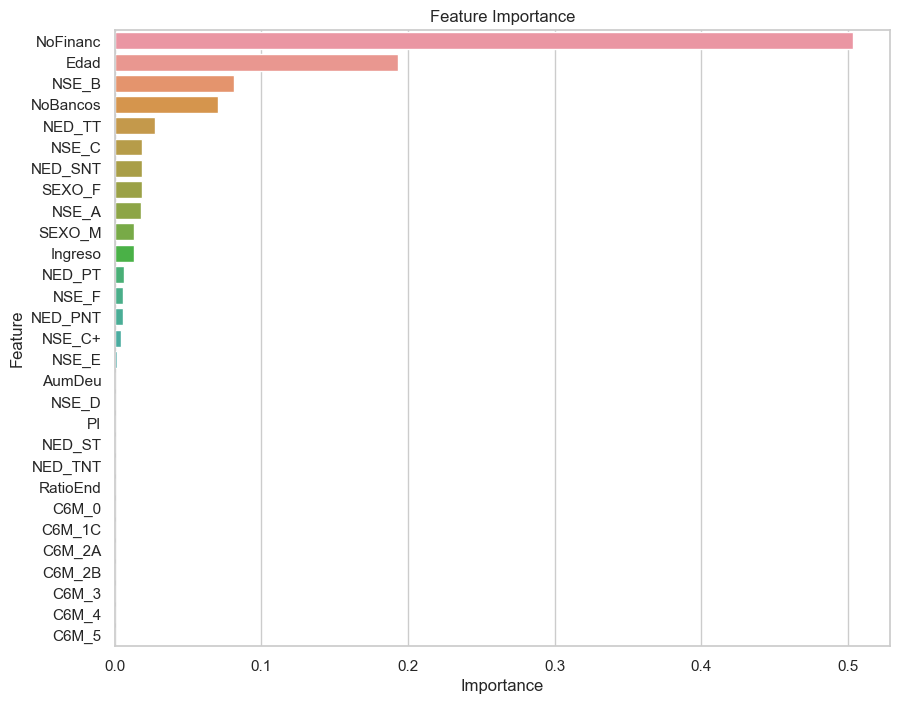

In [ ]:
Boo = GradientBoostingClassifier(n_estimators=500, learning_rate=0.19, max_depth=1, random_state=0)
Boo.fit(X_train, y_train_db)
feature_importance = Boo.feature_importances_

# Obtener los nombres de las características
feature_names = X_train.columns

# Crear un DataFrame con la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Ordenar el DataFrame por importancia de forma descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Ahora supongan que la empresa quiere determiner el cutoff que maximice la ganancia y realiza los siguientes supuestos:

Un cliente que realiza default tiene un costo (pérdida) de 50.000 pesos, y el beneficio neto esperado es de 200.000 pesos.
Estime el cutoff (probabilidad), utilizando como criterio el de máxima ganancia, teniendo en cuenta los valores anteriore
 . Comente brevemente los resultods


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_train , y_train_db , test_size = 0.2, random_state = 0)

Para los valores de beneficios y costos dados, busco el modelo Boosting que maximice la ganancia.

In [ ]:
learningRate=np.arange(0.01, 0.2, 0.02)
depth=np.arange(1, 4, 1)
ntrees=np.arange(100, 501, 100)
#cutoff=np.arange(0.4, 0.9, 0.02)

resultsOpt = pd.DataFrame()

for i in ntrees:
    for j in depth:
        for h in learningRate:
            Boo = GradientBoostingClassifier(n_estimators=i, learning_rate=h, max_depth=j, random_state=0)

            #Ajusta el modelo
            Boo.fit(x_train, y_train.iloc[:, 0])

            #Calcula probailidad de 1 en test
            y_proba = Boo.predict_proba(x_test)[:,1]

            #proba_test es una dframe que tiene la probailida de valor 1 y el verdadero valor en test
            y_test.columns = ['y_test']
            proba_test = pd.concat([pd.DataFrame(y_proba, columns = ['prob']),pd.DataFrame(y_test).reset_index(drop=True)], axis =1,join="inner")
            #odena proba_test por la probabilidad en forma descendente
            proba_test.sort_values(by=['prob'], inplace=True, ascending=True)
            #Creo una nueva variable llamada beneficio
            conditions = [(proba_test['y_test'] == 0),
                          (proba_test['y_test'] == 1) ]
            values = [200000, -50000]
            proba_test['beneficio'] = np.select(conditions, values)
            #Creo una nueva variable llamada benef_acum con el beneficio acumulado
            proba_test['benef_acum'] = proba_test['beneficio'].cumsum()
            #Calculo la Máxima Ganancia
            gananciaMaxima = proba_test['benef_acum'].max()
            #Calculo el cutoff que se corresponde con la maxima ganancia
            cutoff = proba_test.iloc[np.argmax(proba_test['benef_acum'])]['prob']

            res = pd.DataFrame([[i,j,h, gananciaMaxima, cutoff]])
            resultsOpt = pd.concat([resultsOpt,res])

In [ ]:
resultsOpt.columns = ['NTrees','Depth','Lambda','MaxGanancia', "Cutoff"]
resultsOpt.sort_values(["MaxGanancia"], ascending=False)

,NTrees,Depth,Lambda,MaxGanancia,Cutoff
0,400,2,0.19,231850000,0.645818
0,500,1,0.17,231750000,0.604064
0,500,2,0.15,231750000,0.668024
0,400,2,0.15,231700000,0.620591
0,500,1,0.19,231650000,0.588684
...,...,...,...,...,...
0,100,2,0.01,221700000,0.512107
0,300,1,0.01,221400000,0.553812
0,100,1,0.03,221350000,0.550723
0,200,1,0.01,220200000,0.519074


**Comentario de resultados:**

Para un beneficio esperado de 200.000 pesos y una pérdida por default de 50.000 pesos, el modelo de Boosting óptimo tiene como hiperparámetros 400 árboles, profundidad igual a 2 y learning rate equivalente a 0.19. Con esos hiperparámetros se obtiene la máxima ganancia de 231.850.000. Como el beneficio esperado de un cliente que no defaultea es 4 veces mayor al costo del mismo, eso te lleva a tener un cutoff de 0.645818. Esto representa un punto de corte elevado, "flexibilizando" la cesión de créditos al ser potencialmente más beneficiosos que costosos. Si el beneficio esperado fuese menor o el costo de default fuese mayor es esperable que el cutoff óptimo disminuya.  

Ajusto mi modelo óptimo con los hiperparámetros hallados con los datos de entrenamiento.

In [ ]:
Boo = GradientBoostingClassifier(n_estimators=400, learning_rate=0.19, max_depth=2, random_state=0)
Boo.fit(x_train, y_train.iloc[:, 0])
y_proba = Boo.predict_proba(x_test)[:,1]
y_test.columns = ['y_test']
proba_test = pd.concat([pd.DataFrame(y_proba, columns = ['prob']),pd.DataFrame(y_test).reset_index(drop=True)], axis =1)
proba_test.sort_values(by=['prob'], inplace=True, ascending=True)

#Creo variable costo
conditions = [(proba_test['y_test'] == 0),
           (proba_test['y_test'] == 1)]
values = [200000, -50000]
proba_test['beneficio'] = np.select(conditions, values)
proba_test['benef_acum'] = proba_test['beneficio'].cumsum()
gananciaMaxima = proba_test['benef_acum'].max()
#cutoff = proba_test.iloc[np.argmax(proba_test['benef_acum']),:]['prob']
#proba_test['benef_acum'].idxmax()
cutoff = proba_test.iloc[np.argmax(proba_test['benef_acum'])]['prob']

Grafico el beneficio acumulado en función del cutoff. Se observa como la ganancia máxima se obtiene efectivamente con un cutoff en el entorno de 0.645818.

<Axes: xlabel='prob', ylabel='benef_acum'>

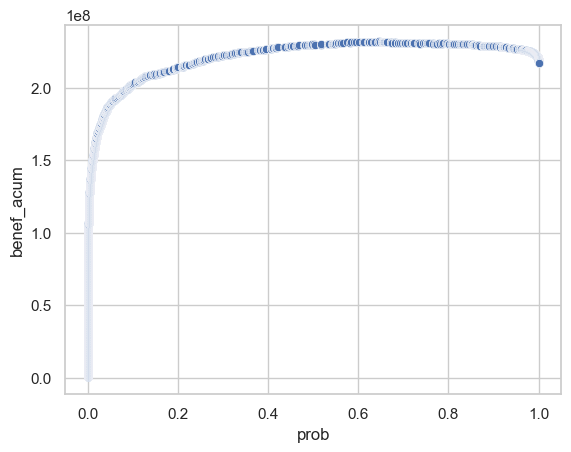

In [ ]:
sns.scatterplot(x=proba_test["prob"], y=proba_test["benef_acum"])

Con los datos de test sin etiquetar hago las predicciones con mi modelo óptimo.

In [ ]:
y_proba_test = Boo.predict_proba(X_test_default)[:, 1]
print(y_proba_test)

[8.07645213e-04 9.99568230e-01 1.14181252e-03 ... 1.25300999e-04
 6.74380217e-07 8.41154184e-04]


Clasifico los datos nuevos de test en relación al cutoff óptimo encontrado. Si la probabilidad de default es mayor a 0.645818 el cliente se clasificará como clase 1, y si la probabilidad de default es menor a ese cutoff se clasificará como clase 0 (no defaultea).

In [ ]:
cutoff = 0.645818 # Este es el cutoff óptimo que has determinado

# Asignar clase 1 a aquellos con probabilidad mayor que el cutoff, y clase 0 en otro caso
y_pred_test = np.where(y_proba_test > cutoff, 1, 0)
db_test_default['Predicted_Class'] = y_pred_test
print(db_test_default)
db_test_default.to_csv('db_test_default_with_class', index=False)

      Edad NSE SEXO  Ingreso  NED  NoBancos  NoFinanc  RatioEnd C6M  AumDeu  \
0       38   B    M    29097   TT         1         1         4  2B    -3.0   
1       41  C+    M    62723  TNT         2         5        10   3    15.0   
2       43   F    M    50852  TNT         0         0        12  1C    -9.0   
3       50   D    F    59376  TNT         2         3         8  2A     2.0   
4       44   E    F    55297   TT         0         2        52   3    24.0   
...    ...  ..  ...      ...  ...       ...       ...       ...  ..     ...   
1995    35   B    M    24779   TT         2         3         4  1C    20.0   
1996    33   E    F    25757   ST         0         1        15   4     3.0   
1997    40   B    M    46384  TNT         0         0        68  1C    14.0   
1998    65   A    F    20297  TNT         0         0        17  1C    -6.0   
1999    33   B    F    21342  TNT         3         0        24  1C     1.0   

      PI  Predicted_Class  
0      0               